# Algorand Covid-19 Project

## Exploratory Analysis
## Rahul Zalkikar | rz1567@nyu.edu

### Source documentation:
https://github.com/algorandfoundation/IReport-Covid/blob/master/js/retrieveData.js

In [493]:
from matplotlib import pyplot as plt
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import numpy as np
from datetime import datetime
date = str(datetime.today().strftime('%Y-%m-%d'))

In [494]:
cleaner_data_df = pd.read_csv('cleaner_covidData'+date+'.csv')
print(cleaner_data_df.shape)
cleaner_data_df.head()

(1149, 40)


,tx_id,age_group,country_code,state_code,region_code,gender,3_dig_zip,doctors_office,walk_in_clinic,virtual_care,hospital_or_ER,other,hospitalized,when_discharged,still_in_hospital,when_admitted,received_care,symptom_quarantine,voluntary_quarantine,personally_required_quarantine,general_quarantine,when_quarantine_ended,still_in_quarantine,when_quarantine_started,left_quarantine_temporarily,was_quarantined,fever,cough,difficulty_breathing,fatigue,sore_throat,when_symptoms_ended,still_symptomatic,when_symptoms_started,is_symptomatic,test_date,test_location,test_results,tried_to_get_tested,tested
0,UGY5YWRRYLLCDC5SD2BIAUEBXKZROG4N56VT6QRZBZD566...,55.0,US,NY,NY,f,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,1.0,NaN,NaN,NaN,1.0,2020-03-10,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0
1,5USYC4OOGQYGSKRS3LLTRCSLYIX5CY6Y2HIDRY6S3MISED...,40.0,AU,ACT,ACT,m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0
2,MSJEL2ZTRSNKJLA6G5H5ITPLY6ZFYBFVG47G3765XM7OQJ...,65.0,US,CO,NaN,m,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1.0,NaN,NaN,NaN,2020-03-20,NaN,2020-03-13,-1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,2020-03-20,3.0,-1.0,NaN,1.0
3,FJD33KOQXQ5E2SA5VWB5MAIHXZTKVZUM5NEK7FJN56UKGS...,40.0,US,NY,NY,f,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0
4,QTLPDQHRDHMD5NGGIZFSRZ4MQACT3MK76JZ6JMDXDNLIRZ...,20.0,US,MD,MD,m,207.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,-1.0,-1.0


In [495]:
cleaner_data_df.describe() # time columns: when_discharged, when_admitted, when_quarantine_ended, when_quarantine_started

,age_group,3_dig_zip,doctors_office,walk_in_clinic,virtual_care,hospital_or_ER,other,hospitalized,still_in_hospital,received_care,symptom_quarantine,personally_required_quarantine,general_quarantine,left_quarantine_temporarily,was_quarantined,fever,cough,difficulty_breathing,fatigue,sore_throat,still_symptomatic,is_symptomatic,test_location,test_results,tried_to_get_tested,tested
count,1144.000000,575.000000,7.0,3.0,11.0,5.0,2.0,5.000000,0.0,1144.000000,79.0,52.0,310.0,634.000000,1137.000000,66.0,94.0,45.0,94.0,86.0,75.0,1146.000000,24.000000,24.00000,945.000000,1142.000000
mean,36.824301,310.426087,1.0,1.0,1.0,1.0,1.0,0.200000,NaN,-0.959790,1.0,1.0,1.0,0.488959,0.194371,1.0,1.0,1.0,1.0,1.0,1.0,-0.753927,2.875000,0.50000,-0.831746,-0.956217
std,15.587915,306.309779,0.0,0.0,0.0,0.0,0.0,1.095445,NaN,0.280841,0.0,0.0,0.0,0.872996,0.981360,0.0,0.0,0.0,0.0,0.0,0.0,0.657245,1.329024,1.14208,0.662436,0.292786
min,1.000000,12.000000,1.0,1.0,1.0,1.0,1.0,-1.000000,NaN,-1.000000,1.0,1.0,1.0,-1.000000,-1.000000,1.0,1.0,1.0,1.0,1.0,1.0,-1.000000,1.000000,-1.00000,-1.000000,-1.000000
25%,20.000000,100.000000,1.0,1.0,1.0,1.0,1.0,-1.000000,NaN,-1.000000,1.0,1.0,1.0,-1.000000,-1.000000,1.0,1.0,1.0,1.0,1.0,1.0,-1.000000,2.000000,-1.00000,-1.000000,-1.000000
50%,30.000000,207.000000,1.0,1.0,1.0,1.0,1.0,1.000000,NaN,-1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,-1.000000,3.000000,1.00000,-1.000000,-1.000000
75%,50.000000,336.500000,1.0,1.0,1.0,1.0,1.0,1.000000,NaN,-1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,-1.000000,4.000000,1.00000,-1.000000,-1.000000
max,85.000000,986.000000,1.0,1.0,1.0,1.0,1.0,1.000000,NaN,1.000000,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,5.000000,2.00000,2.000000,1.000000


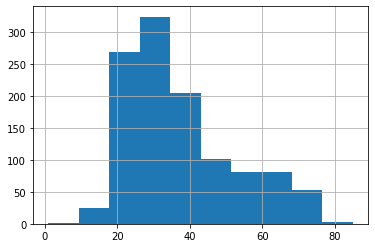

In [496]:
cleaner_data_df.age_group.hist()

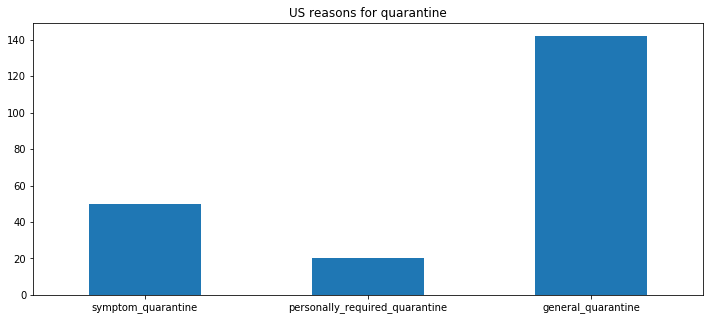

In [497]:
US_quarantinetype_df = cleaner_data_df[cleaner_data_df.country_code == 'US'][['country_code','symptom_quarantine','voluntary_quarantine','personally_required_quarantine','general_quarantine']]
grouped_US_quarantinetype_df = US_quarantinetype_df.groupby('country_code').sum().reset_index(drop=True)

plt.figure(figsize=(12,5))
grouped_US_quarantinetype_df.loc[0].plot.bar()
plt.title("US reasons for quarantine")
plt.xticks(rotation=0)
plt.show()

In [498]:
def get_stats(df):
    print("{} survey responses with data".format(len(df)))
    print('\n')
    num_was_wasnot_quar = len(df[(df.was_quarantined==1.0)|(df.was_quarantined==-1.0)])
    num_was_quar = len(df[df.was_quarantined==1.0])
    print("From {} responses : {}% reported being quarantined".format(num_was_wasnot_quar,round(100*num_was_quar/num_was_wasnot_quar,2)))
    num_left_stayed_quar = len(df[(df.left_quarantine_temporarily==1.0)|(df.left_quarantine_temporarily==-1.0)])
    num_left_quar = len(df[(df.left_quarantine_temporarily==1.0)])
    #print("From {} responses : {}% left quarantine temporarily".format(num_left_stayed_quar,round(100*num_left_quar/num_left_stayed_quar,2)))
    
    num_quar_left_quar = len(df[(df.was_quarantined==1.0)&(df.left_quarantine_temporarily==1.0)])
    print("From those that reported being quarantined {}% left temporarily".format(round(100*num_quar_left_quar/num_was_quar,2)))
    
    print('\n')
    symptomatic_df = df[df.is_symptomatic==1.0]
    print("From {} people who are symptomatic".format(len(symptomatic_df)))
    print('\n')
    print("{}% got care at the doctor's office".format(round(100*len(symptomatic_df[symptomatic_df.doctors_office==1.0])/len(symptomatic_df),2)))
    print("{}% got care at a walk in clinic".format(round(100*len(symptomatic_df[symptomatic_df.walk_in_clinic==1.0])/len(symptomatic_df),2)))
    print("{}% got virtual care".format(round(100*len(symptomatic_df[symptomatic_df.virtual_care==1.0])/len(symptomatic_df),2)))
    print("{}% got care at the hospital/ER".format(round(100*len(symptomatic_df[symptomatic_df.hospital_or_ER==1.0])/len(symptomatic_df),2)))
    print('\n')
    print("{}% reported a fever".format(round(100*len(symptomatic_df[symptomatic_df.fever==1.0])/len(symptomatic_df),2)))
    print("{}% reported a cough".format(round(100*len(symptomatic_df[symptomatic_df.cough==1.0])/len(symptomatic_df),2)))
    print("{}% reported difficulty breathing".format(round(100*len(symptomatic_df[symptomatic_df.difficulty_breathing==1.0])/len(symptomatic_df),2)))
    print("{}% reported fatigue".format(round(100*len(symptomatic_df[symptomatic_df.fatigue==1.0])/len(symptomatic_df),2)))
    print("{}% reported sore throat".format(round(100*len(symptomatic_df[symptomatic_df.sore_throat==1.0])/len(symptomatic_df),2)))

In [499]:
get_stats(cleaner_data_df)

1149 survey responses with data


From 1137 responses : 59.72% reported being quarantined
From those that reported being quarantined 69.51% left temporarily


From 141 people who are symptomatic


4.96% got care at the doctor's office
2.13% got care at a walk in clinic
7.09% got virtual care
2.84% got care at the hospital/ER


46.81% reported a fever
66.67% reported a cough
31.91% reported difficulty breathing
66.67% reported fatigue
60.99% reported sore throat


In [ ]:
############ WORK IN PROGRESS ############ 

In [479]:
cols_to_encode = ['hospitalized','received_care','left_quarantine_temporarily',
                  'was_quarantined','is_symptomatic','test_location','test_results',
                  'tried_to_get_tested','tested','gender','age_group']

cols_not_encoding = ['country_code','state_code','doctors_office','walk_in_clinic','virtual_care','hospital_or_ER','other',
                      'symptom_quarantine','voluntary_quarantine','personally_required_quarantine','general_quarantine',
                      'still_in_quarantine',
                      'still_symptomatic',
                      'fever','cough','difficulty_breathing','fatigue','sore_throat']

adjusted_df = pd.get_dummies(data=cleaner_data_df[cols_to_encode], 
                             columns=cols_to_encode)

adjusted_cols = ['not_hospitalized','hospitalized',
                 'no_care_received','care_received',
                 'left_quarantine_temporarily','stayed_in_quarantine',
                 'not_quarantined','was_quarantined',
                 'not_symptomatic','is_symptomatic',
                 'tested_at_dr_office','tested_at_hospital','tested_at_urgent_care','tested_at_ad_hoc','other',
                 'tested_negative','tested_positive','tested_still_waiting',
                 'testing_not_attempted','testing_attempted','testing_attempted_and_denied',
                 'not_tested','tested',
                 'female','male',
                 'age_group_1','age_group_10','age_group_20','age_group_30','age_group_40','age_group_50','age_group_55','age_group_60','age_group_65','age_group_70','age_group_75','age_group_85']

adjusted_df.columns = adjusted_cols
#adjusted_df.head()
#print(adjusted_df.shape)
new_df = pd.concat([cleaner_data_df[cols_not_encoding], adjusted_df])
new_df = new_df.dropna(axis=0, subset=['state_code'])
#print(new_df.shape)
new_df = new_df.fillna(0)
new_df[['voluntary_quarantine', 'still_in_quarantine']] = new_df[['voluntary_quarantine', 'still_in_quarantine']].astype(bool)
new_df[['voluntary_quarantine', 'still_in_quarantine']] = new_df[['voluntary_quarantine', 'still_in_quarantine']].astype(float)
#new_df.head(20)

In [481]:
grouped_df = new_df.groupby(['country_code','state_code']).sum().reset_index()

In [483]:
#grouped_df.tail()

In [484]:
#grouped_df.describe()

In [485]:
#grouped_df.to_csv('WORLD_grouped_sums'+date+'.csv',index=False)

In [334]:
def get_stats(df):
    
    print("From {} surveys\n".format(len(new_df)))
    
    got_care = 0
    for col in df.columns[2:7]:
        print("{}% got care from {}".format(round((100*sum(df[col]))/len(new_df),2),col))
        got_care += sum(df[col])
    print("\n")
    for col in df.columns[7:11]:
        print("{}% underwent {}".format(round((100*sum(df[col]))/len(new_df),2),col.replace("_"," ")))
    print("\n")
    for col in df.columns[13:18]:
        print("{}% reported {}".format(round((100*sum(df[col]))/len(new_df),2),col))
    print("\nOverall:\n")
    print("{}% Did not Receive Care".format(round(100*(1-(got_care/len(new_df)))),2))
    print("{}% Still in Quarantine".format(round((100*sum(df['still_in_quarantine']))/len(new_df),2),col))
    print("{}% Still Symptomatic".format(round((100*sum(df['still_symptomatic']))/len(new_df),2),col))
    print("{}% Left Quarantine Temporarily".format(round((100*sum(df['left_quarantine_temporarily']))/len(new_df),2),col))
    print("{}% Left Quarantine Temporarily".format(round((100*sum(df['stayed_in_quarantine']))/len(new_df),2),col))

In [204]:
us_grouped_df = grouped_df[grouped_df.country_code == 'US']